In [1]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
data_path = ""
file_path = data_path + "merged_data.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.shape

(3402103, 64)

In [6]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
0,2022,1,1,1,6,1/1/2022 12:00:00 AM,9E,20363,9E,N296PQ,5468,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10685,1068503,30685,BMI,"Bloomington/Normal, IL",IL,17,Illinois,41,2110,2106.0,-4.0,0.0,0.0,-1.0,2100-2159,12.0,2118.0,2134.0,4.0,2155,2138.0,-17.0,0.0,0.0,-2.0,2100-2159,0.0,NaN,0.0,105.0,92.0,76.0,1.0,533.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,1,1,6,1/1/2022 12:00:00 AM,9E,20363,9E,N301PQ,5140,10685,1068503,30685,BMI,"Bloomington/Normal, IL",IL,17,Illinois,41,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,605,556.0,-9.0,0.0,0.0,-1.0,0600-0659,15.0,611.0,836.0,5.0,901,841.0,-20.0,0.0,0.0,-2.0,0900-0959,0.0,NaN,0.0,116.0,105.0,85.0,1.0,533.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,1,1,6,1/1/2022 12:00:00 AM,9E,20363,9E,N308PQ,4815,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,13367,1336705,33367,MLI,"Moline, IL",IL,17,Illinois,41,1230,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1328,NaN,NaN,NaN,NaN,NaN,1300-1359,1.0,B,0.0,118.0,NaN,NaN,1.0,633.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,1,1,6,1/1/2022 12:00:00 AM,9E,20363,9E,N308PQ,4815,13367,1336705,33367,MLI,"Moline, IL",IL,17,Illinois,41,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1500,NaN,NaN,NaN,NaN,NaN,1500-1559,NaN,NaN,NaN,NaN,1803,NaN,NaN,NaN,NaN,NaN,1800-1859,1.0,B,0.0,123.0,NaN,NaN,1.0,633.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,1,1,1,6,1/1/2022 12:00:00 AM,9E,20363,9E,N313PQ,5298,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10685,1068503,30685,BMI,"Bloomington/Normal, IL",IL,17,Illinois,41,1405,1358.0,-7.0,0.0,0.0,-1.0,1400-1459,16.0,1414.0,1436.0,2.0,1449,1438.0,-11.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,104.0,100.0,82.0,1.0,533.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,3402103.0,2.019872e+03,1.430577,2018.0,2019.0,2020.0,2021.0,2022.0
QUARTER,3402103.0,2.535266e+00,1.103899,1.0,2.0,3.0,3.0,4.0
MONTH,3402103.0,6.592982e+00,3.368330,1.0,4.0,7.0,9.0,12.0
DAY_OF_MONTH,3402103.0,1.574045e+01,8.778739,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,3402103.0,3.965818e+00,2.000752,1.0,2.0,4.0,6.0,7.0
OP_CARRIER_AIRLINE_ID,3402103.0,1.998701e+04,379.460030,19393.0,19805.0,19977.0,20366.0,21171.0
OP_CARRIER_FL_NUM,3402103.0,2.628222e+03,1659.133335,1.0,1187.0,2429.0,3797.0,8787.0
ORIGIN_AIRPORT_ID,3402103.0,1.319221e+04,1272.255852,10135.0,12511.0,13930.0,13930.0,15919.0
ORIGIN_AIRPORT_SEQ_ID,3402103.0,1.319226e+06,127226.125098,1013505.0,1251103.0,1393006.0,1393007.0,1591905.0
ORIGIN_CITY_MARKET_ID,3402103.0,3.145771e+04,1098.148920,30135.0,30977.0,30977.0,31703.0,35454.0


In [8]:
df_ORD = df[(df['ORIGIN'] == 'ORD') | (df['DEST'] == 'ORD')]

In [9]:
df_ORD.shape

(2570483, 64)

In [10]:
df_ORD

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME
20,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1015,1013.0,-2.0,0.0,0.0,-1.0,1000-1059,15.0,1028.0,1237.0,12.0,1255,1249.0,-6.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,220.0,216.0,189.0,1.0,1250.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1340,1428.0,48.0,48.0,1.0,3.0,1300-1359,16.0,1444.0,1817.0,15.0,1752,1832.0,40.0,40.0,1.0,2.0,1700-1759,0.0,NaN,0.0,192.0,184.0,153.0,1.0,1250.0,6,40.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
22,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2576,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1847,2006.0,79.0,79.0,1.0,5.0,1800-1859,31.0,2037.0,2257.0,9.0,2132,2306.0,94.0,94.0,1.0,6.0,2100-2159,0.0,NaN,0.0,105.0,120.0,80.0,1.0,621.0,3,0.0,44.0,15.0,0.0,35.0,NaN,NaN,NaN
23,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2903,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,906,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1159,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,A,0.0,113.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,523,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1255,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1420,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,145.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402098,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N861RW,3694,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,1005,1017.0,12.0,12.0,0.0,0.0,1000-1059,38.0,1055.0,1208.0,6.0,1146,1214.0,28.0,28.0,1.0,1.0,1100-1159,0.0,NaN,0.0,101.0,117.0,73.0,1.0,403.0,2,0.0,0.0,16.0,0.0,12.0,NaN,NaN,NaN
3402099,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N863RW,3608,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1014,1009.0,-5.0,0.0,0.0,-1.0,1000-1059,44.0,1053.0,1313.0,12.0,1300,1325.0,25.0,25.0,1.0,1.0,1300-1359,0.0,NaN,0.0,166.0,196.0,140.0,1.0,801.0,4,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN
3402100,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N863RW,3642,11423,1142307,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,754,744.0,-10.0,0.0,0.0,-1.0,0700-0759,21.0,805.0,857.0,34.0,929,931.0,2.0,2.0,0.0,0.0,0900-0959,0.0,NaN,0.0,95.0,107.0,52.0,1.0,299.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3402101,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N870RW,5889,13930,13930

In [12]:
airlines = {
    '9E': 'Endeavor Air Inc.',
    'AA': 'American Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'B6': 'JetBlue Airways',
    'CO': 'Continental Air Lines Inc.',
    'DH': 'Independence Air',
    'DL': 'Delta Air Lines Inc.',
    'EA': 'Eastern Air Lines Inc.',
    'EV': 'ExpressJet Airlines LLC d/b/a aha!',
    'F9': 'Frontier Airlines Inc.',
    'FL': 'AirTran Airways Corporation',
    'G4': 'Allegiant Air',
    'HA': 'Hawaiian Airlines Inc.',
    'HP': 'America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)',
    'KH': 'Aloha Air Cargo',
    'ML (1)': 'Midway Airlines Inc. (1)',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Air Lines',
    'NW': 'Northwest Airlines Inc.',
    'OH': 'PSA Airlines Inc.',
    'OO': 'SkyWest Airlines Inc.',
    'PA (1)': 'Pan American World Airways (1)',
    'PI': 'Piedmont Aviation Inc.',
    'PS': 'Ukraine International Airlines',
    'QX': 'Horizon Air',
    'TW': 'Trans World Airways LLC',
    'TZ': 'ATA Airlines d/b/a ATA',
    'UA': 'United Air Lines Inc.',
    'US': 'US Airways Inc.',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines Co.',
    'XE': 'ExpressJet Airlines Inc.',
    'YV': 'Mesa Airlines Inc.',
    'YX': 'Republic Airline'
}

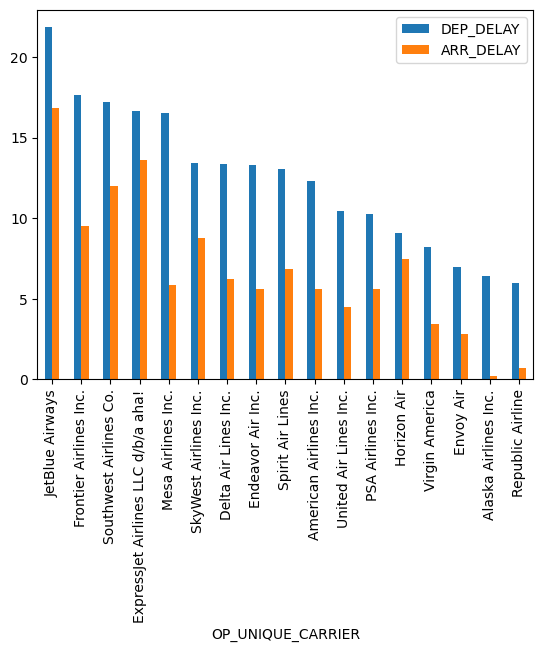

In [13]:
df_ORD.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}) \
            .rename(index=airlines) \
            .sort_values('DEP_DELAY', ascending=False).plot.bar()
plt.show()

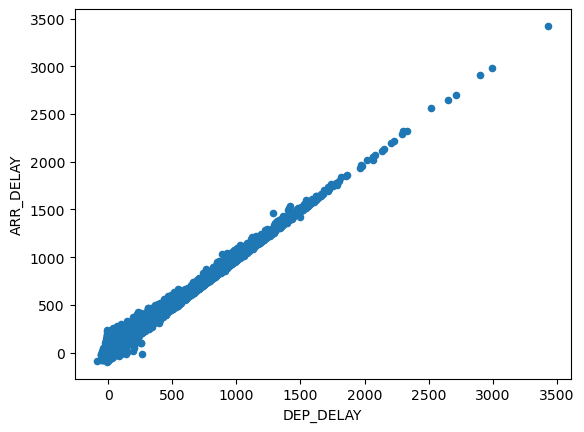

In [14]:
df_ORD.plot.scatter(x='DEP_DELAY', y='ARR_DELAY')
plt.show()

In [15]:
outliers = (((df_ORD.DEP_DELAY - df_ORD.DEP_DELAY.mean()).abs() > df_ORD.DEP_DELAY.std()*3) | 
            ((df_ORD.ARR_DELAY - df_ORD.ARR_DELAY.mean()).abs() > df_ORD.ARR_DELAY.std()*3))

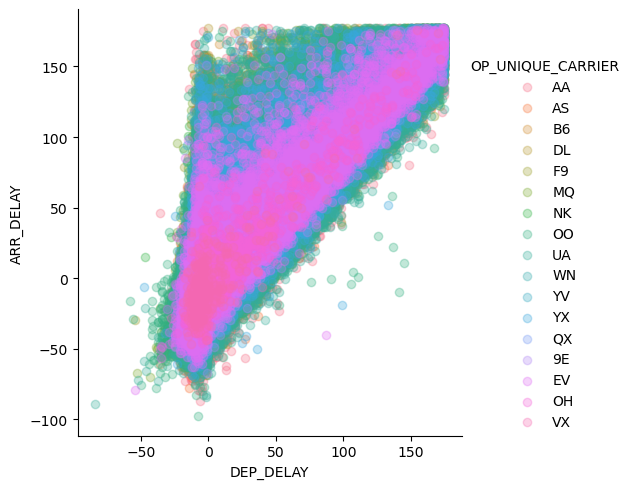

In [16]:
sns.lmplot(x='DEP_DELAY', y='ARR_DELAY', data=df_ORD[~outliers],
           fit_reg=False, hue='OP_UNIQUE_CARRIER', scatter_kws={'alpha':0.3})
plt.show()

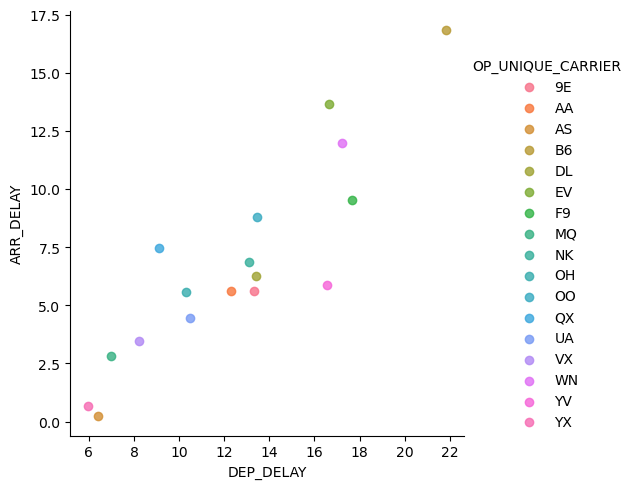

In [17]:
carrier_averages = df_ORD.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).reset_index()
sns.lmplot(x='DEP_DELAY', y='ARR_DELAY', data=carrier_averages,
           fit_reg=False, hue='OP_UNIQUE_CARRIER', )
plt.show()

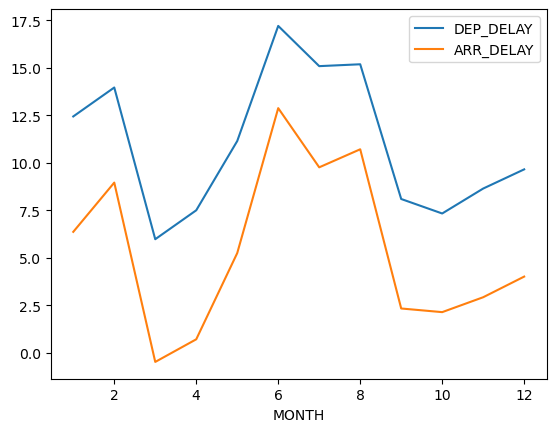

In [18]:
df_ORD.groupby('MONTH').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.line()
plt.show()


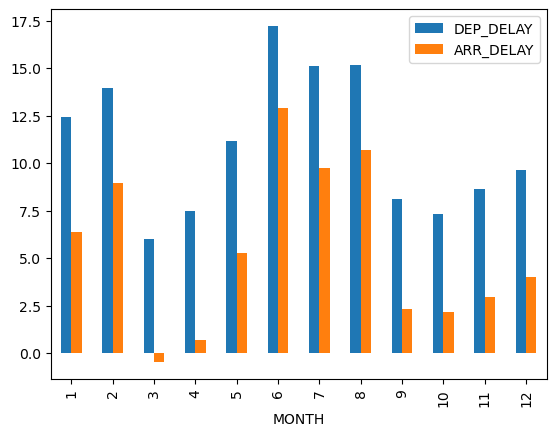

In [19]:
df_ORD.groupby('MONTH').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.bar()
plt.show()

In [20]:
df_ORD['CRSDepHour'] = pd.cut(df_ORD.CRS_DEP_TIME, list(range(0, 2500, 100)))

/var/folders/7t/8q7jrbms6zng7kl7df_mf6_c0000gn/T/ipykernel_88504/790728285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ORD['CRSDepHour'] = pd.cut(df_ORD.CRS_DEP_TIME, list(range(0, 2500, 100)))


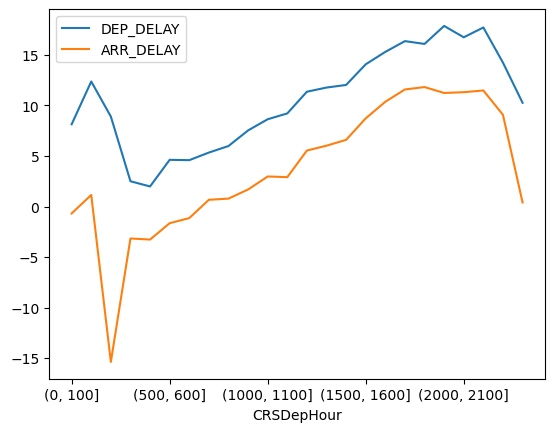

In [21]:
df_ORD.groupby('CRSDepHour').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot()
plt.show()

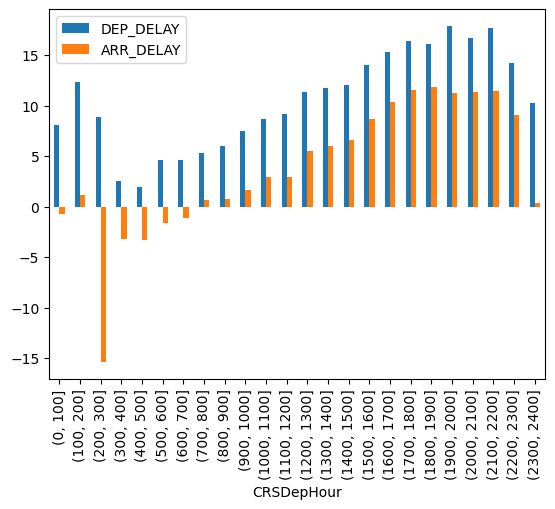

In [22]:
df_ORD.groupby('CRSDepHour').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).plot.bar()
plt.show()

<AxesSubplot: ylabel='Density'>

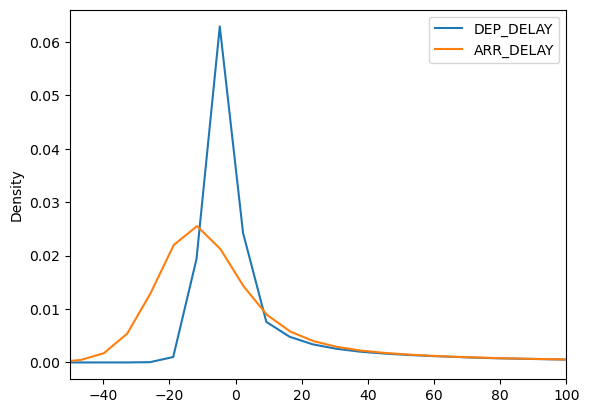

In [23]:
df_ORD.loc[:,['DEP_DELAY', 'ARR_DELAY']].plot.density(xlim=(-50,100))

<AxesSubplot: >

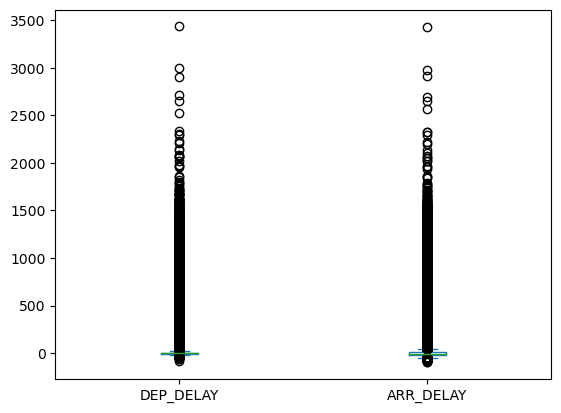

In [24]:
df_ORD.loc[:,['DEP_DELAY', 'ARR_DELAY']].plot.box()

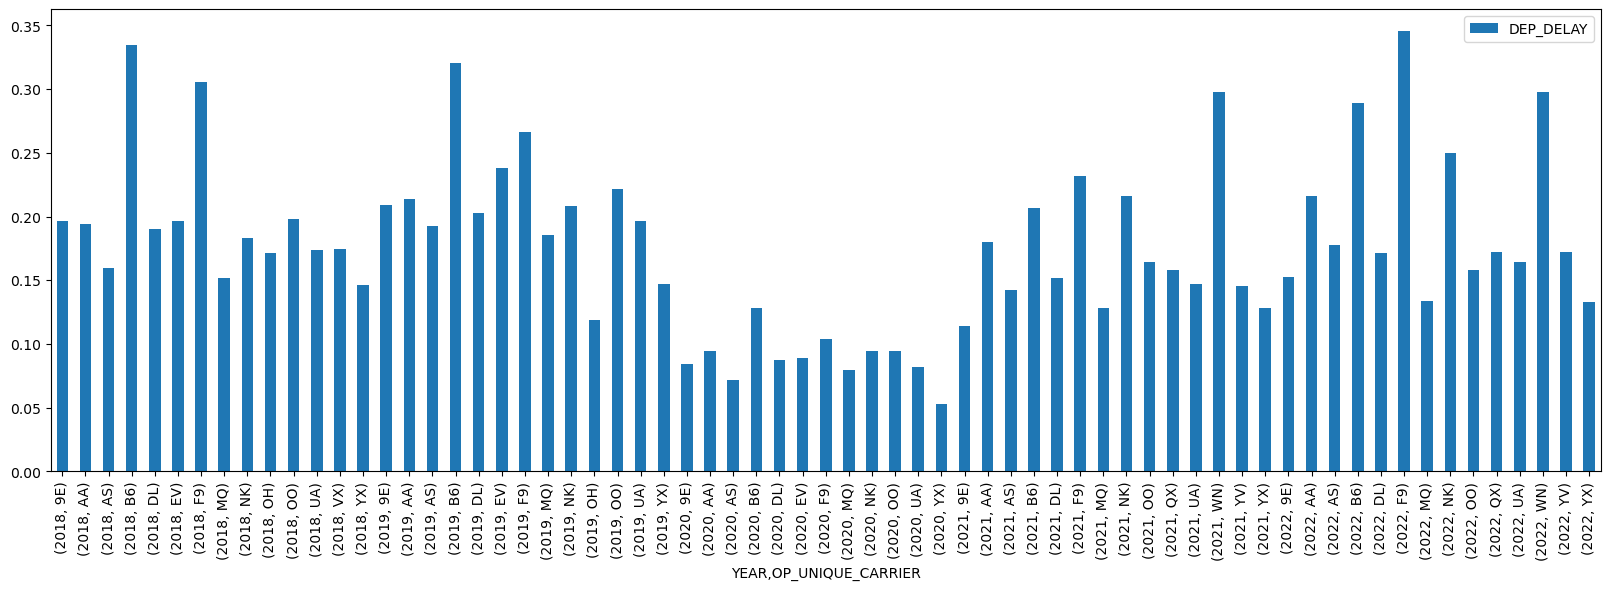

In [25]:
df_ORD.groupby(['YEAR', 'OP_UNIQUE_CARRIER']).agg({'DEP_DELAY':lambda x: (x>15).sum()/len(x)}).plot.bar(figsize=(20, 6))
plt.show()

In [26]:
# tripVer = df[['ORIGIN']].drop_duplicates().rename(columns={'ORIGIN':'id'})
tripEdge = df_ORD.assign(flightID = range(len(df_ORD))) \
                  .rename(columns={'DEP_DELAY':'delay',
                                   'ORIGIN':'src',
                                   'DEST':'dst',
                                   'DEST_CITY_NAME':'city_dst',
                                   'DEST_STATE_ABR':'state_dst'}) \
                  .loc[:,['flightID','delay','src','dst','city_dst','state_dst']]


In [27]:
tripEdge

,flightID,delay,src,dst,city_dst,state_dst
20,0,-2.0,ORD,SLC,"Salt Lake City, UT",UT
21,1,48.0,SLC,ORD,"Chicago, IL",IL
22,2,79.0,ORD,BWI,"Baltimore, MD",MD
23,3,NaN,ORD,DCA,"Washington, DC",VA
24,4,NaN,DCA,ORD,"Chicago, IL",IL
...,...,...,...,...,...,...
3402098,2570478,12.0,ORD,MCI,"Kansas City, MO",MO
3402099,2570479,-5.0,ORD,DFW,"Dallas/Fort Worth, TX",TX
3402100,2570480,-10.0,DSM,ORD,"Chicago, IL",IL
3402101,2570481,-3.0,ORD,JFK,"New York, NY",NY


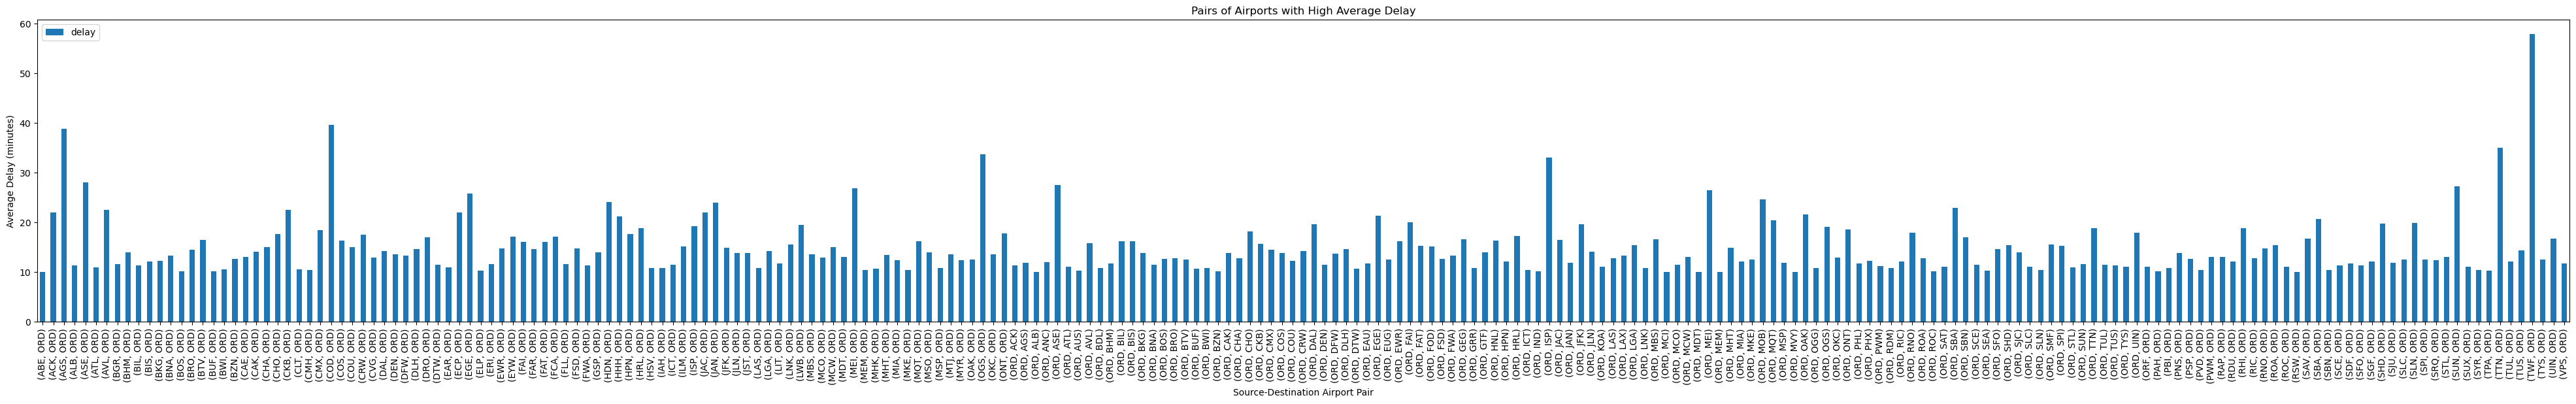

In [28]:
import matplotlib.pyplot as plt

threshold = 10
high_delay = tripEdge.groupby(['src', 'dst']).agg({'delay': 'mean'}).reset_index()
high_delay = high_delay[high_delay['delay'] > threshold]   # filter for high delay
high_delay.set_index(['src', 'dst'], inplace=True)  # set the index to source-destination airport pair
high_delay.plot.bar(y='delay', figsize=(50, 6))
plt.title('Pairs of Airports with High Average Delay')
plt.xlabel('Source-Destination Airport Pair')
plt.ylabel('Average Delay (minutes)')
plt.show()

In [29]:
delay_tbl_src = tripEdge.loc[(tripEdge['src'] == 'ORD') & (tripEdge['delay'] > 50),
                         ['dst', 'delay']].rename(columns={'dst': 'Destination Airport',
                                                            'delay': 'value'})

In [30]:
delay_tbl_src 

,Destination Airport,value
22,BWI,79.0
27,BNA,346.0
89,PHX,111.0
104,LGA,146.0
118,FLL,907.0
...,...,...
3401529,RSW,57.0
3401546,SFO,156.0
3401563,DEN,116.0
3402064,IND,67.0


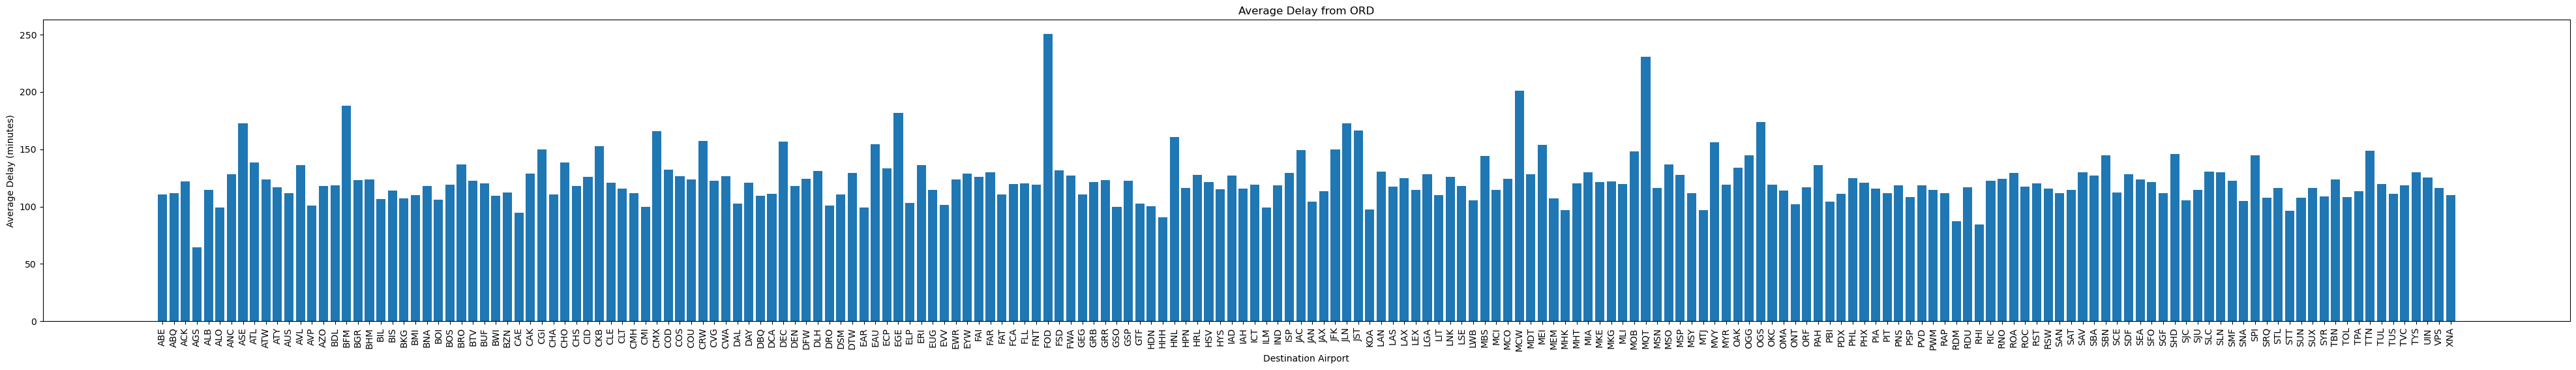

In [31]:
# Group by the destination airport and calculate the mean delay
avg_delay = delay_tbl_src.groupby('Destination Airport').mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(50, 6))
plt.bar(avg_delay['Destination Airport'], avg_delay['value'])
plt.title('Average Delay from ORD')
plt.xlabel('Destination Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

In [32]:
delay_tbl_dest = tripEdge.loc[(tripEdge['dst'] == 'ORD') & (tripEdge['delay'] > 50),
                         ['src', 'delay']].rename(columns={'src': 'Source Airport',
                                                            'delay': 'value'})

In [33]:
delay_tbl_dest

,Source Airport,value
94,PHX,572.0
128,MIA,72.0
140,DCA,120.0
220,DCA,183.0
310,ATL,195.0
...,...,...
3401462,DEN,67.0
3401467,LAX,228.0
3401497,SJU,52.0
3402047,ORF,100.0


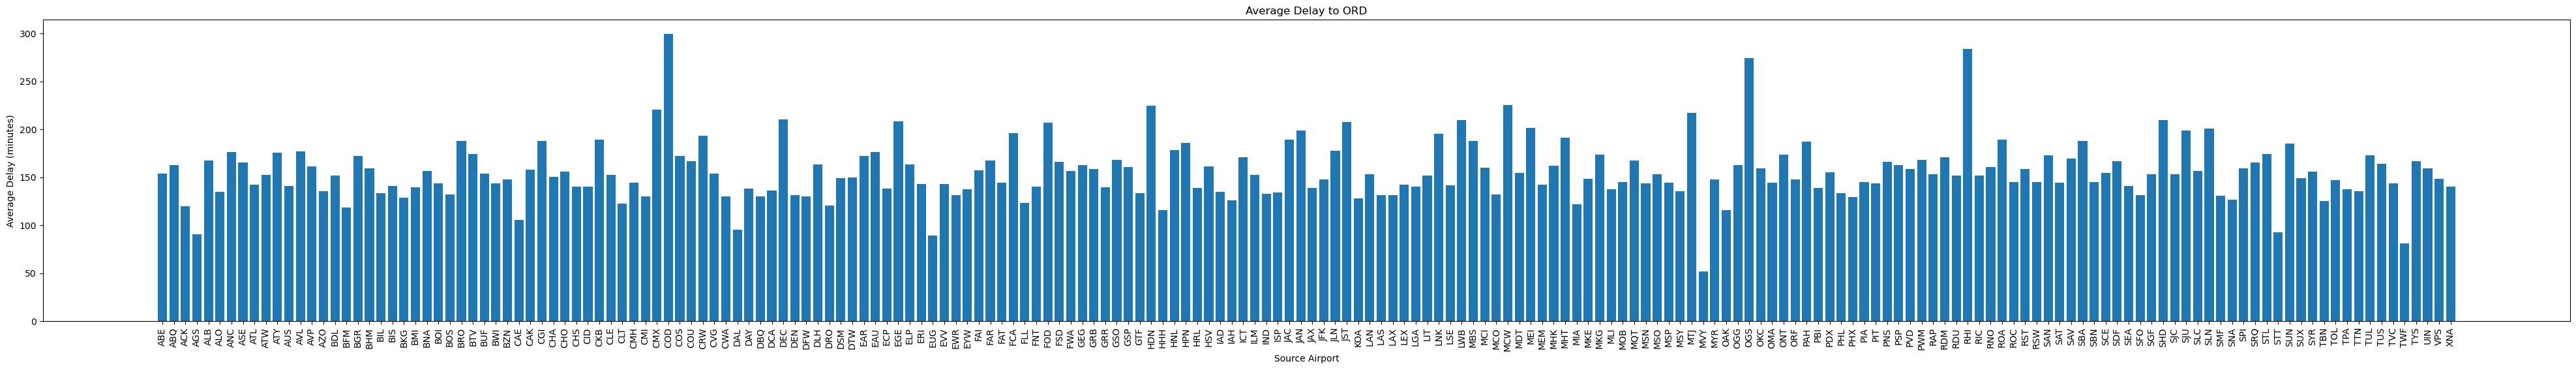

In [34]:
avg_delay = delay_tbl_dest.groupby('Source Airport').mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(50, 6))
plt.bar(avg_delay['Source Airport'], avg_delay['value'])
plt.title('Average Delay to ORD')
plt.xlabel('Source Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=90)
plt.show()

In [35]:
df_ORD

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,CRSDepHour
20,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1015,1013.0,-2.0,0.0,0.0,-1.0,1000-1059,15.0,1028.0,1237.0,12.0,1255,1249.0,-6.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,220.0,216.0,189.0,1.0,1250.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1000, 1100]"
21,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1340,1428.0,48.0,48.0,1.0,3.0,1300-1359,16.0,1444.0,1817.0,15.0,1752,1832.0,40.0,40.0,1.0,2.0,1700-1759,0.0,NaN,0.0,192.0,184.0,153.0,1.0,1250.0,6,40.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"(1300, 1400]"
22,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2576,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1847,2006.0,79.0,79.0,1.0,5.0,1800-1859,31.0,2037.0,2257.0,9.0,2132,2306.0,94.0,94.0,1.0,6.0,2100-2159,0.0,NaN,0.0,105.0,120.0,80.0,1.0,621.0,3,0.0,44.0,15.0,0.0,35.0,NaN,NaN,NaN,"(1800, 1900]"
23,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2903,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,906,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1159,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,A,0.0,113.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(900, 1000]"
24,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,523,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1255,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1420,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,145.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1200, 1300]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402098,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N861RW,3694,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,1005,1017.0,12.0,12.0,0.0,0.0,1000-1059,38.0,1055.0,1208.0,6.0,1146,1214.0,28.0,28.0,1.0,1.0,1100-1159,0.0,NaN,0.0,101.0,117.0,73.0,1.0,403.0,2,0.0,0.0,16.0,0.0,12.0,NaN,NaN,NaN,"(1000, 1100]"
3402099,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N863RW,3608,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1014,1009.0,-5.0,0.0,0.0,-1.0,1000-1059,44.0,1053.0,1313.0,12.0,1300,1325.0,25.0,25.0,1.0,1.0,1300-1359,0.0,NaN,0.0,166.0,196.0,140.0,1.0,801.0,4,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,"(1000, 1100]"
3402100,2018,4,12,31,1,12/31/2018 12:00:00 AM,YX,20452,YX,N863RW,3642,11423,1142307,31423,DSM,"Des Moines, IA",IA,19,Iowa,61,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,754,744.0,-10.0,0.0,0.0,-1.0,0700-0759,21.0,805.0,857.0,34.0,929,931.0,2.0,2.0,0.0,0.0,0900-0959,0.0,NaN,0.0,95.0,107.0,52.0,1.0,29

(-1.1028659347532368,
 1.1601846356257624,
 -1.1240216769649538,
 1.1011438893428602)

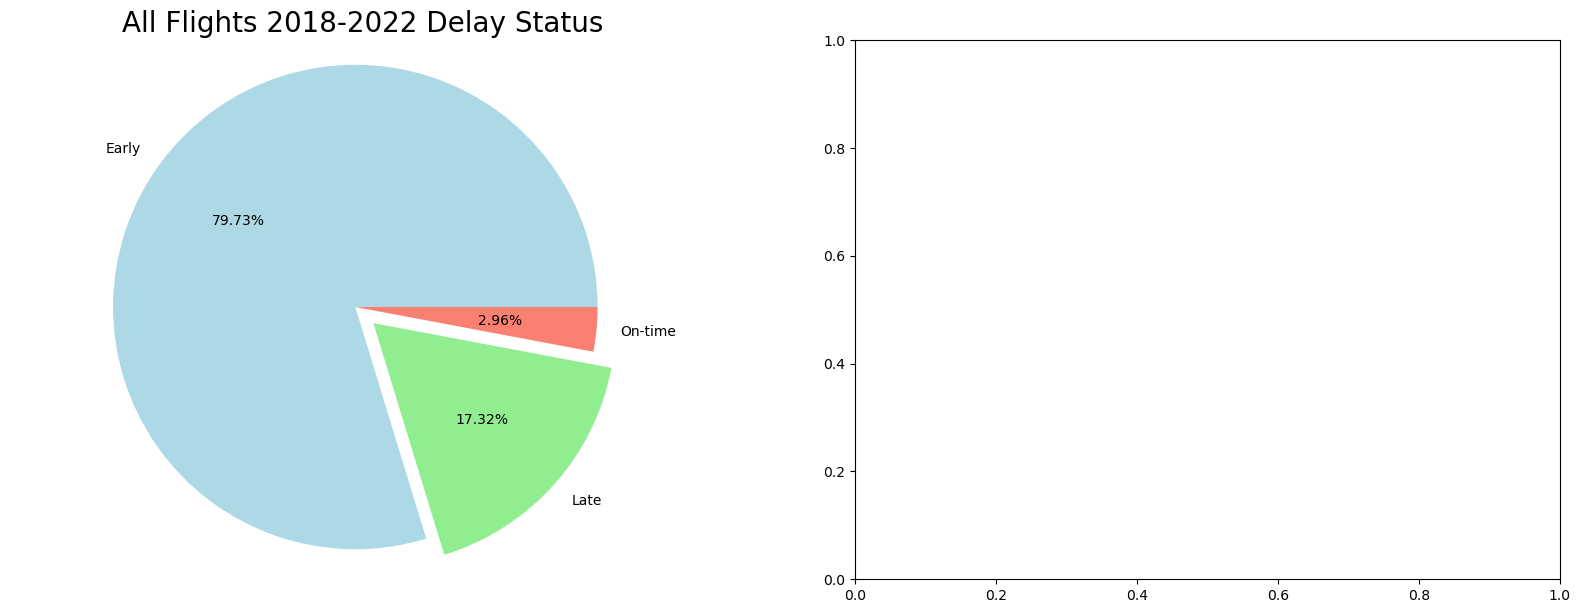

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,7))

flights_df = df_ORD.fillna('Unknown').groupby('DEP_DEL15').size().reset_index(name='counts')
flights_df['percent'] = flights_df['counts'] / flights_df['counts'].sum()
flights_df.replace({0:'Early', 1:'Late', 'Unknown':'On-time'}, inplace=True)

labels = flights_df.DEP_DEL15
sizes = flights_df.percent
colors = ['lightblue', 'lightgreen', 'salmon']
explode = (0, 0.1, 0 )

axes[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
axes[0].set_title('All Flights 2018-2022 Delay Status', fontsize=20)
axes[0].axis('equal')



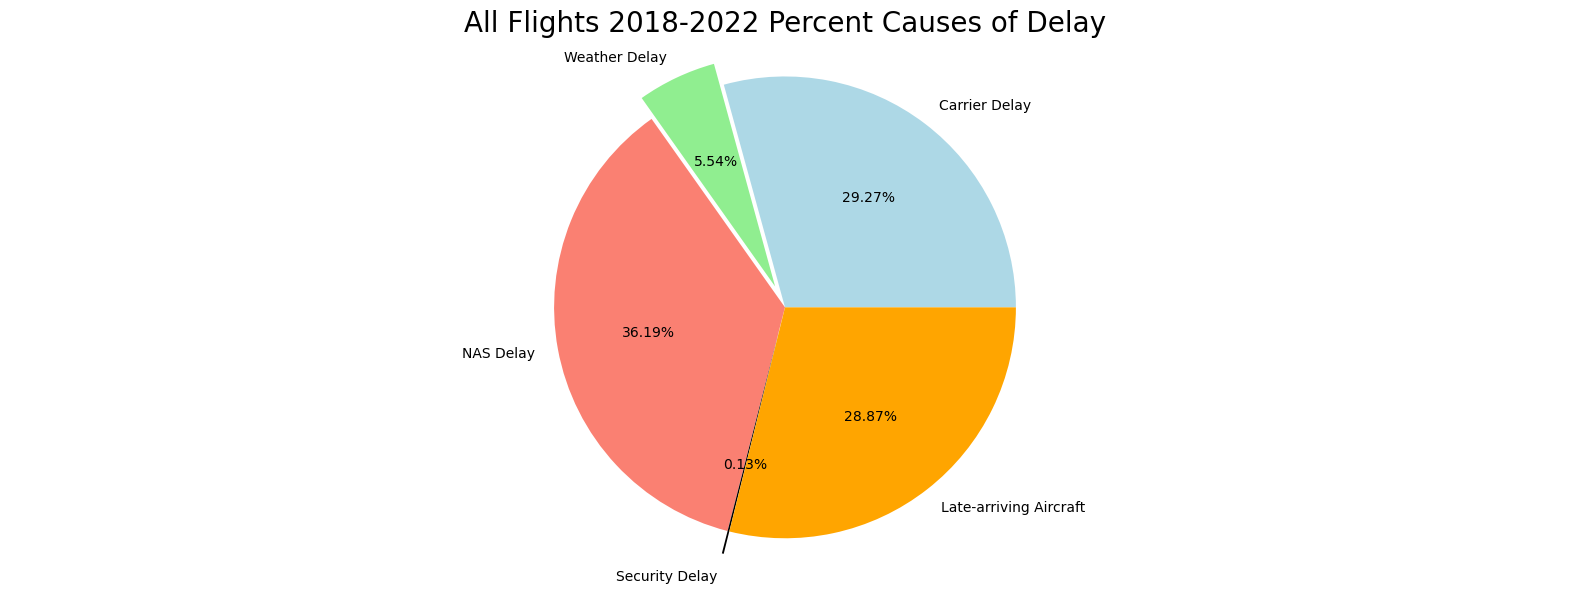

In [37]:
# Get total number of delays
total_delays = df_ORD["DEP_DEL15"].count()

count_dict = {'Carrier Delay': (df_ORD['CARRIER_DELAY'] > 0).sum(),
              'Weather Delay': (df_ORD['WEATHER_DELAY'] > 0).sum(),
              'NAS Delay': (df_ORD['NAS_DELAY'] > 0).sum(),
              'Security Delay': (df_ORD['SECURITY_DELAY'] > 0).sum(),
              'Late-arriving Aircraft': (df_ORD['LATE_AIRCRAFT_DELAY'] > 0).sum()}

# create a new dataframe from the dictionary
df_count = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Count'])


# Rename columns and calculate percent of delays for each cause
df_count['percent'] = np.round(100*(df_count['Count']/(total_delays)), 2)

# Set up pie chart
labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late-arriving Aircraft']
sizes = df_count.percent
colors = ['lightblue', 'lightgreen', 'salmon', 'black', 'orange']
explode = (0, 0.1, 0, 0.1, 0)
fig, axes = plt.subplots(figsize=(20,7))

# Create pie chart
axes.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%')
axes.set_title('All Flights 2018-2022 Percent Causes of Delay', fontsize=20)
axes.axis('equal')

# Show chart
plt.show()

In [161]:
df_ORD.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,CRSDepHour,CRS_DEP_Hour,CRS_ARR_Hour
20,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1015,1013.0,-2.0,0.0,0.0,-1.0,1000-1059,15.0,1028.0,1237.0,12.0,1255,1249.0,-6.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,220.0,216.0,189.0,1.0,1250.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1000, 1100]",10,12
21,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,1732,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1340,1428.0,48.0,48.0,1.0,3.0,1300-1359,16.0,1444.0,1817.0,15.0,1752,1832.0,40.0,40.0,1.0,2.0,1700-1759,0.0,NaN,0.0,192.0,184.0,153.0,1.0,1250.0,6,40.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"(1300, 1400]",13,17
22,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2576,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1847,2006.0,79.0,79.0,1.0,5.0,1800-1859,31.0,2037.0,2257.0,9.0,2132,2306.0,94.0,94.0,1.0,6.0,2100-2159,0.0,NaN,0.0,105.0,120.0,80.0,1.0,621.0,3,0.0,44.0,15.0,0.0,35.0,NaN,NaN,NaN,"(1800, 1900]",18,21
23,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,2903,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,906,NaN,NaN,NaN,NaN,NaN,0900-0959,NaN,NaN,NaN,NaN,1159,NaN,NaN,NaN,NaN,NaN,1100-1159,1.0,A,0.0,113.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(900, 1000]",9,11
24,2022,1,1,1,6,1/1/2022 12:00:00 AM,AA,19805,AA,N103US,523,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1255,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN,NaN,NaN,1420,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,145.0,NaN,NaN,1.0,612.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1200, 1300]",12,14


In [107]:
carrier_delays = df_ORD[df_ORD['CARRIER_DELAY'] > 0].loc[:, 'CARRIER_DELAY'].mean()
weather_delays = df_ORD[df_ORD['WEATHER_DELAY'] > 0].loc[:, 'WEATHER_DELAY'].mean()
nas_delays = df_ORD[df_ORD['NAS_DELAY'] > 0].loc[:, 'NAS_DELAY'].mean()
security_delays = df_ORD[df_ORD['SECURITY_DELAY'] > 0].loc[:, 'SECURITY_DELAY'].mean()
late_aircraft_delays = df_ORD[df_ORD['LATE_AIRCRAFT_DELAY'] > 0].loc[:, 'LATE_AIRCRAFT_DELAY'].mean()


In [108]:
avg_delay_categories = {'Categories of Delays': ['Carrier', 'Weather', 'NAS', 'Security', 'Late aircraft'], 'Average Minutes': [carrier_delays, weather_delays, nas_delays, security_delays, late_aircraft_delays]}




In [109]:
delays = pd.DataFrame(avg_delay_categories)

<AxesSubplot: title={'center': 'Average delays in minutes per category'}, xlabel='Categories of Delays'>

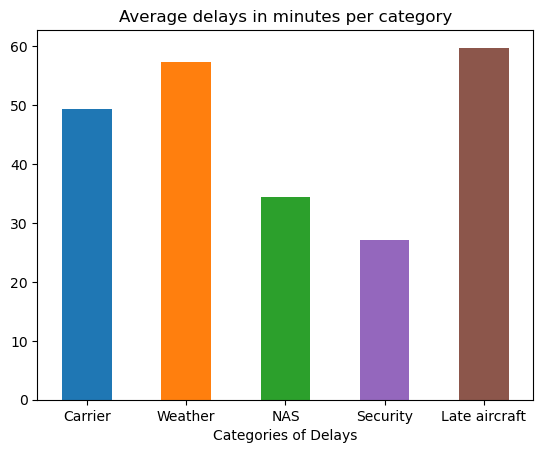

In [110]:
delays.plot.bar(x='Categories of Delays', y='Average Minutes',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5'], title = 'Average delays in minutes per category')

In [131]:
# Plot total Arrival and Departure Delays by Month
bar_arr = pd.DataFrame(df_ORD.groupby('MONTH').sum('ARR_DELAY'))
bar_del = pd.DataFrame(df_ORD.groupby('MONTH').sum('DEP_DELAY'))


<AxesSubplot: title={'center': 'Total Arrival Delays per Month'}, xlabel='MONTH'>

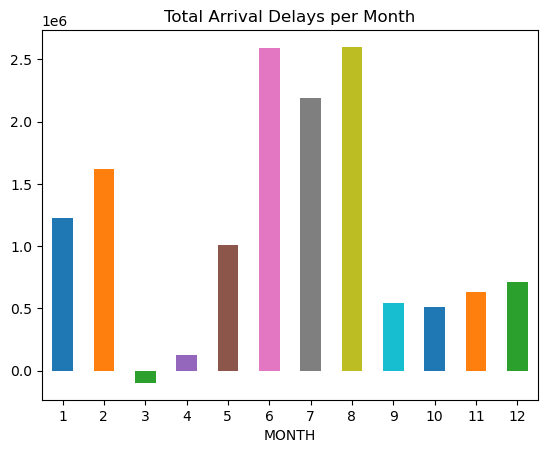

In [139]:
bar_arr.plot.bar(use_index=True, y='ARR_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'], title = 'Total Arrival Delays per Month')



<AxesSubplot: title={'center': 'Total Departure Delays per Month'}, xlabel='MONTH'>

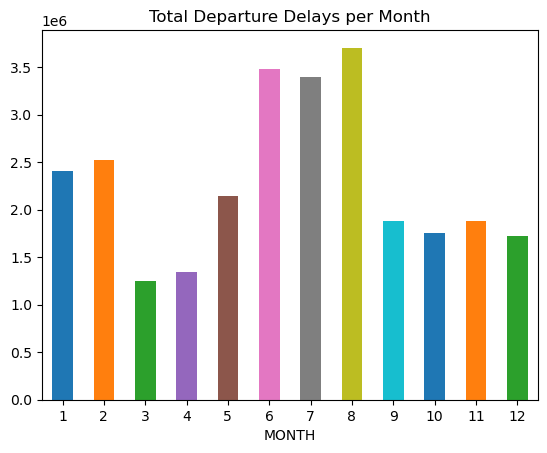

In [138]:
bar_del.plot.bar(use_index=True, y='DEP_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'], title = 'Total Departure Delays per Month')



In [140]:
# Plot total Arrival and Departure Delays by Hour
bar_arr = pd.DataFrame(df_ORD.groupby('DAY_OF_WEEK').sum('ARR_DELAY'))
bar_del = pd.DataFrame(df_ORD.groupby('DAY_OF_WEEK').sum('DEP_DELAY'))

<AxesSubplot: title={'center': 'Total Arrival Delays per Day of Week'}, xlabel='DAY_OF_WEEK'>

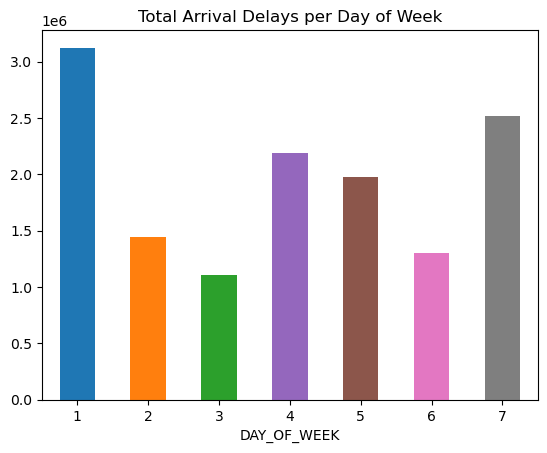

In [141]:
bar_arr.plot.bar(use_index=True, y='ARR_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7'], title = 'Total Arrival Delays per Day of Week')



<AxesSubplot: title={'center': 'Total Departure Delays per Day of Week'}, xlabel='DAY_OF_WEEK'>

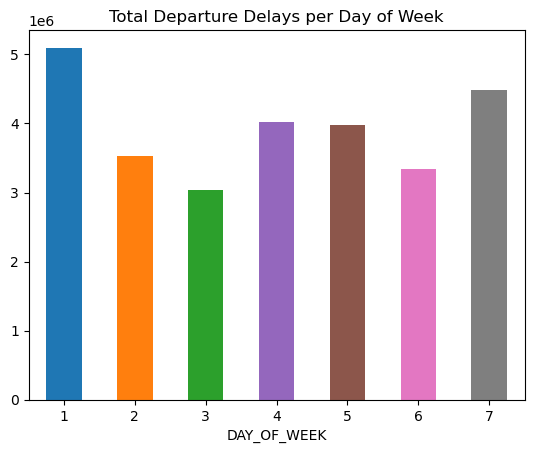

In [142]:
bar_del.plot.bar(use_index=True, y='DEP_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7'], title = 'Total Departure Delays per Day of Week')



In [148]:
df_ORD_hourly = df_ORD
df_ORD_hourly['CRS_DEP_Hour'] = df_ORD_hourly['CRS_DEP_TIME'] // 100
df_ORD_hourly['CRS_ARR_Hour'] = df_ORD_hourly['CRS_ARR_TIME'] // 100

/var/folders/7t/8q7jrbms6zng7kl7df_mf6_c0000gn/T/ipykernel_88504/3312345812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ORD_hourly['CRS_DEP_Hour'] = df_ORD_hourly['CRS_DEP_TIME'] // 100
/var/folders/7t/8q7jrbms6zng7kl7df_mf6_c0000gn/T/ipykernel_88504/3312345812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ORD_hourly['CRS_ARR_Hour'] = df_ORD_hourly['CRS_ARR_TIME'] // 100


In [150]:
# Plot total Arrival and Departure Delays by Hour
bar_arr = pd.DataFrame(df_ORD_hourly.groupby('CRS_ARR_Hour').sum('ARR_DELAY'))
bar_del = pd.DataFrame(df_ORD_hourly.groupby('CRS_DEP_Hour').sum('DEP_DELAY'))

<AxesSubplot: title={'center': 'Total Arrival Delays per Scheduled Hour of Arrival'}, xlabel='CRS_ARR_Hour'>

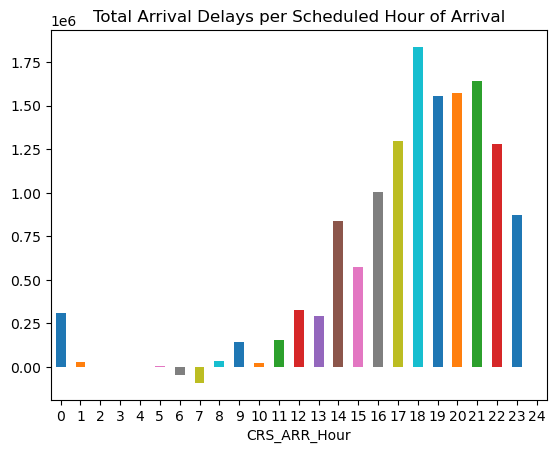

In [151]:
bar_arr.plot.bar(use_index=True, y='ARR_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23'], title = 'Total Arrival Delays per Scheduled Hour of Arrival')



<AxesSubplot: title={'center': 'Total Departure Delays per Scheduled Hour of Departure'}, xlabel='CRS_DEP_Hour'>

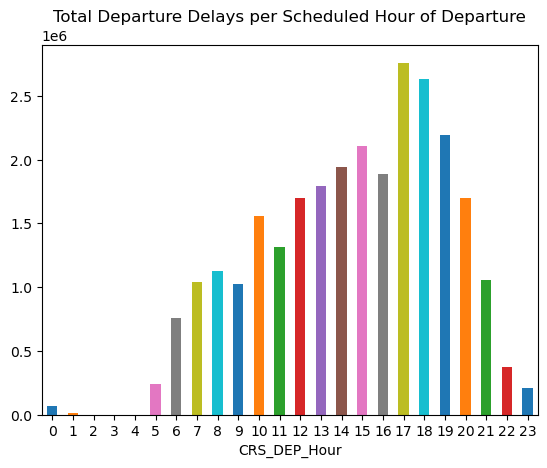

In [152]:
bar_del.plot.bar(use_index=True, y='DEP_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23'], title = 'Total Departure Delays per Scheduled Hour of Departure')


In [171]:
# Delays by Carriers
bar_arr = pd.DataFrame(df_ORD_hourly.groupby('OP_UNIQUE_CARRIER').mean('ARR_DELAY'))
bar_del = pd.DataFrame(df_ORD_hourly.groupby('OP_UNIQUE_CARRIER').mean('DEP_DELAY'))

<AxesSubplot: title={'center': 'Average Arrival Delays by Airline Carrier'}, xlabel='OP_UNIQUE_CARRIER'>

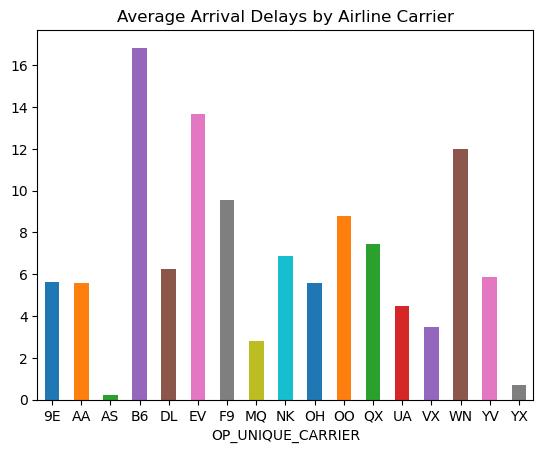

In [172]:
bar_arr.plot.bar(use_index=True, y='ARR_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23'], title = 'Average Arrival Delays by Airline Carrier')



<AxesSubplot: title={'center': 'Average Departure Delays by Airline Carrier'}, xlabel='OP_UNIQUE_CARRIER'>

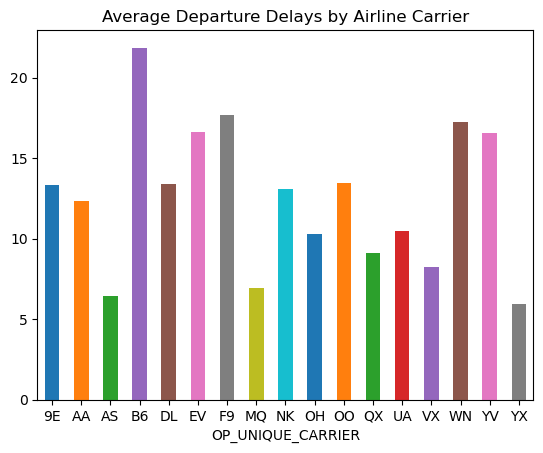

In [173]:
bar_del.plot.bar(use_index=True, y='DEP_DELAY',legend=False, rot=0, color=['C0', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23'], title = 'Average Departure Delays by Airline Carrier')
